# Análisis Probabilístico y Modelado

Este notebook contiene un análisis probabilístico y modelado basado en las respuestas obtenidas del formulario.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('viridis')

# Cargar los datos
file_path = 'Respuestas.xlsx'
sheet_name = 'Respuestas de formulario 1'
df = pd.read_excel(file_path, sheet_name=sheet_name)


## Sección 5
### Problema 1: Probabilidad conjunta de nivel intermedio en Blockchain y considerar esta tecnología útil

In [3]:

# Filtrar los datos para calcular la probabilidad conjunta
  
nivel_intermedio = df['¿Cuál es tu nivel de conocimiento sobre Blockchain? '] == 'Intermedio'
considera_util = df['¿Consideras que el Blockchain es una tecnología útil para la ciberseguridad? '] == 'Sí'

prob_conjunta = (nivel_intermedio & considera_util).mean()

# Mostrar resultado
print(f"Probabilidad conjunta: {prob_conjunta:.4f}")


Probabilidad conjunta: 0.0667


**Interpretacion**: Los resultados revelan que solo el 6.67% de los participantes cumplen simultáneamente las condiciones de tener un conocimiento intermedio sobre Blockchain y considerar esta tecnología útil para la ciberseguridad. Esto indica que, aunque algunos participantes tienen cierto conocimiento, la percepción de utilidad aún no está generalizada. Este hallazgo sugiere una oportunidad significativa para promover la educación y concienciación sobre los beneficios del Blockchain en ciberseguridad.

### Problema 2: Probabilidad de estar actualizado y pertenecer a una carrera específica (Bayes)

In [4]:
# Filtrar datos necesarios
actualizados_bastante = df[df['¿Qué tan actualizado(a) te consideras en las nuevas tecnologías de sistemas computacionales? '] == 'Bastante']
gestion_software = df[df['Carrera'] == 'Licenciatura en Desarrollo y Gestión del Software']

# Calcular P(A): Proporción de estudiantes en "Desarrollo y Gestión de Software"
p_a = len(gestion_software) / len(df)

# Calcular P(B): Proporción de estudiantes bastante actualizados
p_b = len(actualizados_bastante) / len(df)

# Calcular P(B|A): Proporción de estudiantes bastante actualizados en "Desarrollo y Gestión de Software"
p_b_given_a = len(actualizados_bastante[actualizados_bastante['Carrera'] == 'Licenciatura en Desarrollo y Gestión del Software']) / len(gestion_software)

# Aplicar Teorema de Bayes
p_a_given_b = (p_b_given_a * p_a) / p_b

# Mostrar resultado
print(f"La probabilidad de que un estudiante bastante actualizado pertenezca a 'Desarrollo y Gestión de Software' es: {p_a_given_b:.2%}")


La probabilidad de que un estudiante bastante actualizado pertenezca a 'Desarrollo y Gestión de Software' es: 25.00%


**Interpretacion**: El análisis muestra que la probabilidad de que un estudiante considerado "bastante actualizado" pertenezca a la carrera de "Licenciatura en Desarrollo y Gestión de Software" es del 25%. Esto indica que, aunque existe una correlación, no es predominante, y hay espacio para fomentar un mayor enfoque en la actualización tecnológica entre los estudiantes de esta carrera específica. Este resultado resalta la importancia de incluir herramientas y metodologías modernas en el currículo académico.

## Sección 6
### Problema 1: Modelar respuestas de actualización como distribución binomial

n: 30
p: 0.26666666666666666
x: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
binomial_pmf: [9.10002914e-05 9.92730452e-04 5.23439693e-03 1.77652259e-02
 4.36055546e-02 8.24541396e-02 1.24930514e-01 1.55757525e-01
 1.62837412e-01 1.44744366e-01 1.10532061e-01 7.30790489e-02
 4.20758160e-02 2.11850263e-02 9.35442718e-03 3.62838388e-03
 1.23694905e-03 3.70423244e-04 9.72828723e-05 2.23424778e-05
 4.46849557e-06 7.73765467e-07 1.15105607e-07 1.45588119e-08
 1.54411641e-09 1.34759251e-10 9.42372382e-12 5.07675357e-13
 1.97795594e-14 4.96039107e-16 6.01259523e-18]


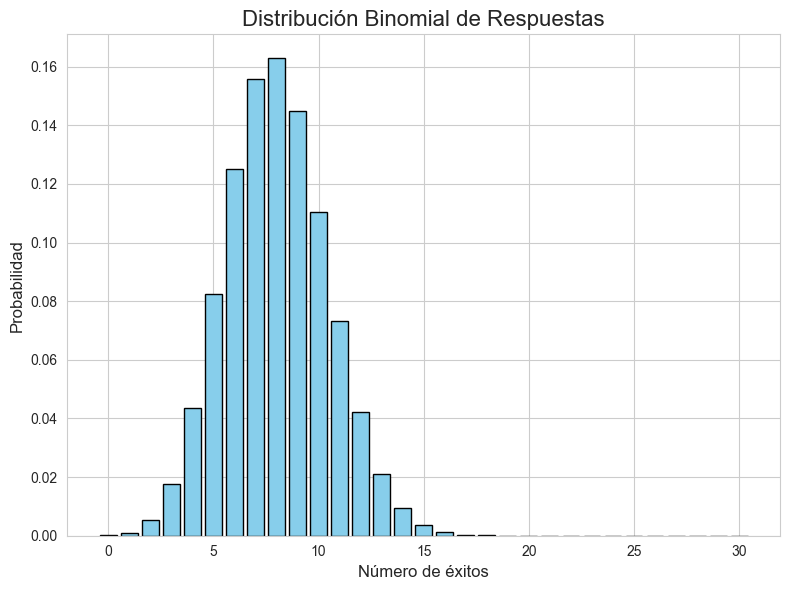

In [5]:
from scipy.stats import binom

# Parámetros para la distribución binomial
n = len(df)
p = df['¿Qué tan actualizado(a) te consideras en las nuevas tecnologías de sistemas computacionales? '].value_counts(normalize=True)['Bastante']

# Generar distribución binomial
x = np.arange(0, n + 1)
binomial_pmf = binom.pmf(x, n, p)

# Imprimir resultados de las variables
print(f"n: {n}")
print(f"p: {p}")
print(f"x: {x}")
print(f"binomial_pmf: {binomial_pmf}")

# Gráfica de la distribución
plt.figure(figsize=(8, 6))
plt.bar(x, binomial_pmf, color='skyblue', edgecolor='black')
plt.title("Distribución Binomial de Respuestas", fontsize=16)
plt.xlabel("Número de éxitos", fontsize=12)
plt.ylabel("Probabilidad", fontsize=12)
plt.tight_layout()
plt.show()


**Interpretacion**: El análisis de la distribución binomial indica que la probabilidad de éxito (responder "bastante actualizado") es moderada, con un valor de p=0.267. La mayoría de las respuestas se concentran alrededor de valores promedio esperados, reflejando que un segmento relevante de la población encuestada reconoce estar actualizada en tecnologías. Este patrón es alentador, aunque señala que todavía queda espacio para ampliar este nivel de actualización en tecnologías emergentes.

### Problema 2: Probabilidad de que exactamente 3 estudiantes tengan nivel avanzado en IA

In [6]:

# Parámetros para la distribución de Poisson
from scipy.stats import poisson

lambda_param = 2  # Promedio de 2 estudiantes por carrera
k = 3  # Exactamente 3 estudiantes

# Calcular probabilidad
probabilidad_poisson = poisson.pmf(k, lambda_param)

# Mostrar resultado
print(f"Probabilidad de exactamente 3 estudiantes con nivel avanzado en IA: {probabilidad_poisson:.4f}")


Probabilidad de exactamente 3 estudiantes con nivel avanzado en IA: 0.1804


**Interpretacion**: Este resultado indica que existe una probabilidad moderada de encontrar un grupo de 3 estudiantes avanzados en IA en una carrera específica. Este análisis es relevante para evaluar la cantidad de estudiantes que poseen un nivel avanzado en esta área dentro de un grupo promedio y puede guiar estrategias para fortalecer la formación en IA. Si se busca aumentar esta proporción, es necesario desarrollar programas educativos más sólidos o actividades de capacitación específicas en Inteligencia Artificial.

## Sección 7


### Problema 1: Ajuste de una Distribución Exponencial

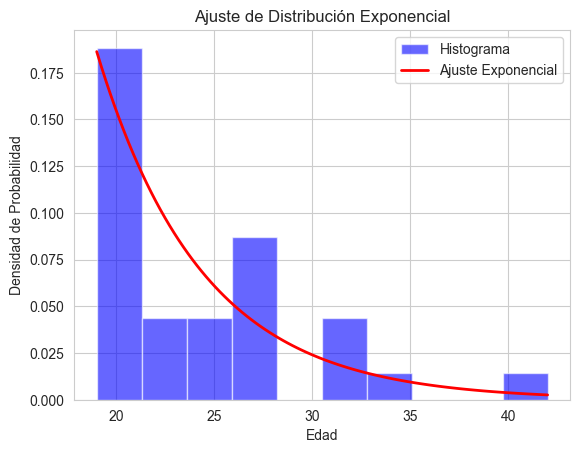

Estadístico KS: 0.230, Valor p: 0.071


In [4]:
from scipy.stats import expon, kstest

# Datos de edades
edades = df['Edad'].dropna()

# Ajustar distribución exponencial
loc, scale = expon.fit(edades)
x = np.linspace(edades.min(), edades.max(), 100)
pdf = expon.pdf(x, loc, scale)

# Visualización
plt.hist(edades, bins=10, density=True, alpha=0.6, color='b', label="Histograma")
plt.plot(x, pdf, 'r-', lw=2, label="Ajuste Exponencial")
plt.title("Ajuste de Distribución Exponencial")
plt.xlabel("Edad")
plt.ylabel("Densidad de Probabilidad")
plt.legend()
plt.show()

# Evaluar el ajuste
ks_stat, p_value = kstest(edades, 'expon', args=(loc, scale))
print(f"Estadístico KS: {ks_stat:.3f}, Valor p: {p_value:.3f}")


## Gráfico del Ajuste
El gráfico muestra un histograma de las edades junto con una curva que representa el ajuste de una distribución exponencial. La curva roja ilustra el modelo teórico de la distribución exponencial, mientras que las barras azules representan los datos reales. Visualmente, se observa que la distribución de los datos sigue de manera razonable la forma esperada de una distribución exponencial, aunque con algunas discrepancias en las frecuencias de las clases.

## Estadístico KS y Valor p
- **Estadístico KS:** 0.230, indica la máxima discrepancia entre la distribución observada y el modelo teórico exponencial.
- **Valor p:** 0.071, que es mayor que el umbral común de significancia (0.05). Esto sugiere que no hay evidencia suficiente para rechazar la hipótesis nula de que los datos siguen una distribución exponencial.


Con base en el valor p, no se puede rechazar la hipótesis de que los datos de las edades siguen una distribución exponencial. Esto implica que el modelo exponencial podría ser adecuado para describir esta variable, aunque pequeñas discrepancias observadas en el histograma podrían deberse a variabilidad natural en los datos o a limitaciones del modelo.



### Prueba de hipotesis 
# Planteamiento de Hipótesis

### Contexto:
Queremos analizar si existe una relación entre el **interés en incluir temas sobre Blockchain en los cursos universitarios** y el **nivel de conocimiento previo** sobre áreas relacionadas, como Blockchain, IA, ML o Criptomonedas. Esto nos permitirá evaluar si el "poco conocimiento" reportado por los participantes podría estar influenciado por la falta de inclusión de estas temáticas en los cursos, a pesar de su interés.

---

### Hipótesis:
- **Hipótesis nula (H₀):**  
  No existe relación entre el interés en incluir temas sobre Blockchain en los cursos universitarios y el nivel de conocimiento previo.  
  > **Interpretación:** El nivel de conocimiento previo es independiente del interés en incluir estos temas en los cursos.

- **Hipótesis alternativa (H₁):**  
  Existe una relación entre el interés en incluir temas sobre Blockchain en los cursos universitarios y el nivel de conocimiento previo.  
  > **Interpretación:** El interés en incluir estos temas en los cursos depende del nivel de conocimiento previo.

---

### Método:
1. **Datos a analizar:**  
   - **Variable 1 (filas):** Nivel de conocimiento sobre Blockchain (e.g., "Nada", "Poco", "Intermedio", "Básico", "Avanzado").
   - **Variable 2 (columnas):** Respuestas a "¿Te gustaría que se incluyeran temas sobre Blockchain?" (e.g., "Sí", "No").

2. **Tipo de prueba:**  
   Se realizará una **prueba de independencia** usando el estadístico chi-cuadrado.

3. **Criterio de decisión:**  
   - Si el valor p obtenido en la prueba es **menor a 0.05**, rechazamos la hipótesis nula (H₀) y concluimos que existe una relación significativa.
   - Si el valor p es **mayor o igual a 0.05**, no se puede rechazar la hipótesis nula.

---

### Justificación:
Este análisis permitirá determinar si la falta de inclusión de estos temas en los cursos puede estar contribuyendo a los bajos niveles de conocimiento, a pesar del interés mostrado por los participantes. Esto podría servir como evidencia para recomendar la integración de estos temas en los programas educativos.

---


In [13]:

from scipy.stats import chi2_contingency

df = pd.read_excel(file_path, sheet_name=sheet_name)

# Seleccionar las columnas relevantes
df_relevant = df[['¿Cuál es tu nivel de conocimiento sobre Blockchain? ', 
                  '¿Te gustaría que se incluyeran temas sobre Blockchain en los cursos universitarios? ']]

# Renombrar las columnas para facilitar el análisis
df_relevant.columns = ['Nivel de Conocimiento', '¿Te gustaría que se incluyeran temas?']

# Crear la tabla de contingencia
contingencia = pd.crosstab(df_relevant['Nivel de Conocimiento'], 
                           df_relevant['¿Te gustaría que se incluyeran temas?'])

# Calcular el test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingencia)

# Mostrar resultados
print("Tabla de Contingencia:")
print(contingencia)
print("\nResultados del Test de Chi-Cuadrado:")
print(f"Estadístico Chi-cuadrado: {chi2:.2f}")
print(f"Grados de libertad: {dof}")
print(f"Valor p: {p:.4f}")

# Interpretar el resultado
if p < 0.05:
    print("🐼")
else:
    print("🦥")


Tabla de Contingencia:
¿Te gustaría que se incluyeran temas?  No  Sí
Nivel de Conocimiento                        
Avanzado                                0   1
Básico                                  1   8
Intermedio                              0   2
Ninguno                                 2  16

Resultados del Test de Chi-Cuadrado:
Estadístico Chi-cuadrado: 0.37
Grados de libertad: 3
Valor p: 0.9463
🦥



## Tabla de Contingencia:
La tabla de contingencia muestra la relación entre el nivel de conocimiento sobre Blockchain y el interés en incluir estos temas en los cursos universitarios. Los principales hallazgos son:
- La mayoría de los participantes que respondieron "Sí" tienen un nivel de conocimiento "Ninguno" (16) o "Básico" (8).
- Los niveles de conocimiento "Avanzado" e "Intermedio" tienen muy pocos participantes, lo que podría limitar el análisis debido al tamaño reducido de esos subgrupos.

## Resultados del Test de Chi-Cuadrado:
- **Estadístico Chi-cuadrado:** 0.37, un valor bajo que sugiere poca diferencia entre las frecuencias observadas y las esperadas bajo la hipótesis nula.
- **Grados de libertad:** 3, calculados en función de las categorías presentes en ambas variables.
- **Valor p:** 0.9463, mucho mayor que el umbral común de significancia (0.05). Esto indica que no hay evidencia estadística suficiente para rechazar la hipótesis nula.

## Conclusión:
No se encontró evidencia suficiente para afirmar que existe una asociación significativa entre el nivel de conocimiento sobre Blockchain y el interés en incluir estos temas en los cursos universitarios. Esto sugiere que:
1. El interés en incluir temas sobre Blockchain podría no depender directamente del nivel de conocimiento actual sobre esta tecnología.
2. Otros factores, como la percepción de utilidad o la curiosidad, podrían estar impulsando este interés.

A pesar de no encontrar una relación estadísticamente significativa, es importante destacar que un gran número de personas con niveles bajos de conocimiento ("Ninguno" o "Básico") expresaron interés en que Blockchain se incluya en los cursos. Esto sugiere que estrategias educativas deberían enfocarse en estos grupos con menor conocimiento, ya que muestran una alta disposición para aprender sobre la tecnología.
